In [11]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime as dt

In [2]:
health_df= pd.read_csv("HealthApp_2k.log_structured.csv")

In [3]:
health_df.head()

,LineId,Time,Component,Pid,Content,EventId,EventTemplate
0,1,20171223-22:15:29:606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>
1,2,20171223-22:15:29:615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>
2,3,20171223-22:15:29:633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON
3,4,20171223-22:15:29:635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...
4,5,20171223-22:15:29:635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data


In [5]:
health_df = health_df.set_index("LineId")
health_df = health_df.reset_index(drop = True)

In [6]:
health_df.head()

,Time,Component,Pid,Content,EventId,EventTemplate
0,20171223-22:15:29:606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>
1,20171223-22:15:29:615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>
2,20171223-22:15:29:633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON
3,20171223-22:15:29:635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...
4,20171223-22:15:29:635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data


In [7]:
health_df[['Date', 'Time']] = health_df['Time'].str.split('-', 1, expand=True)

In [8]:
health_df.head()

,Time,Component,Pid,Content,EventId,EventTemplate,Date
0,22:15:29:606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>,20171223
1,22:15:29:615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>,20171223
2,22:15:29:633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON,20171223
3,22:15:29:635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...,20171223
4,22:15:29:635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data,20171223


In [10]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Time           2000 non-null   object
 1   Component      2000 non-null   object
 2   Pid            2000 non-null   int64 
 3   Content        2000 non-null   object
 4   EventId        2000 non-null   object
 5   EventTemplate  2000 non-null   object
 6   Date           2000 non-null   object
dtypes: int64(1), object(6)
memory usage: 109.5+ KB


In [14]:
# Custom function to extract hour from the custom time format
def extract_hour(time_str):
    time_parts = time_str.split(':')
    hour = int(time_parts[0])
    return hour


In [15]:
health_df['Hour'] = health_df['Time'].apply(extract_hour)

In [16]:
health_df.head()

,Time,Component,Pid,Content,EventId,EventTemplate,Date,Hour
0,22:15:29:606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>,20171223,22
1,22:15:29:615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>,20171223,22
2,22:15:29:633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON,20171223,22
3,22:15:29:635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...,20171223,22
4,22:15:29:635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data,20171223,22


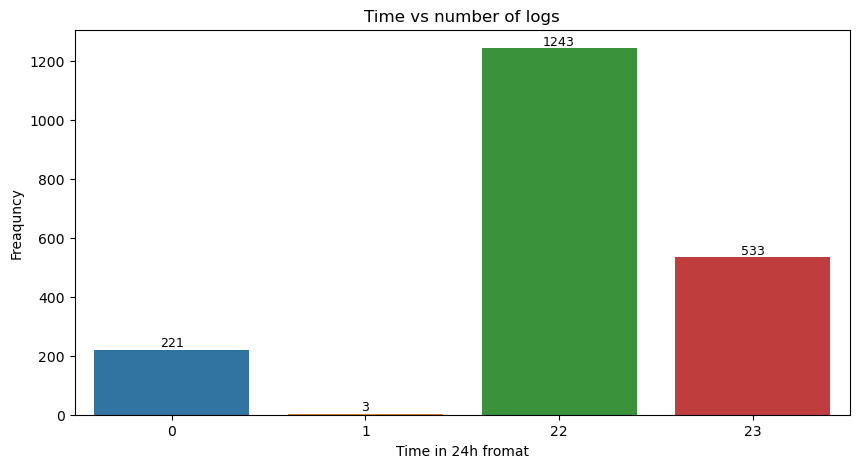

In [26]:
# countplot to get the hour with the higest number of activity in the app 
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Hour',data = health_df)
plt.title('Time vs number of logs')
plt.xlabel('Time in 24h fromat')
plt.ylabel('Freaquncy')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black')

In [24]:
health_df['Hour'].value_counts()

22    1243
23     533
0      221
1        3
Name: Hour, dtype: int64

In [34]:
# Countplot for the top 10 most used features (event_id) in the app

event= health_df['EventId'].value_counts()
# selecting top 10 events 
event = event.head(10)

event_df = pd.DataFrame({'Event':event.index,'Count':event.values})
event_df.head()

,Event,Count
0,E39,273
1,E42,260
2,E22,242
3,E58,241
4,E3,241


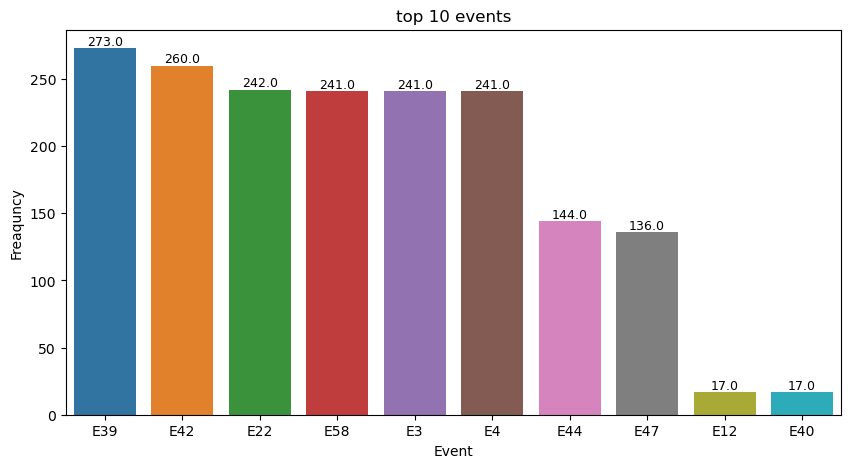

In [35]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='Event',y='Count',data = event_df)
plt.title('top 10 events')
plt.xlabel('Event')
plt.ylabel('Freaquncy')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black')

In [45]:
# freaquncy of top 5 action performed (components)
component = health_df['Component'].value_counts()
component = component.head(5)
component_df = pd.DataFrame({'Name':component.index,'Count':component.values})

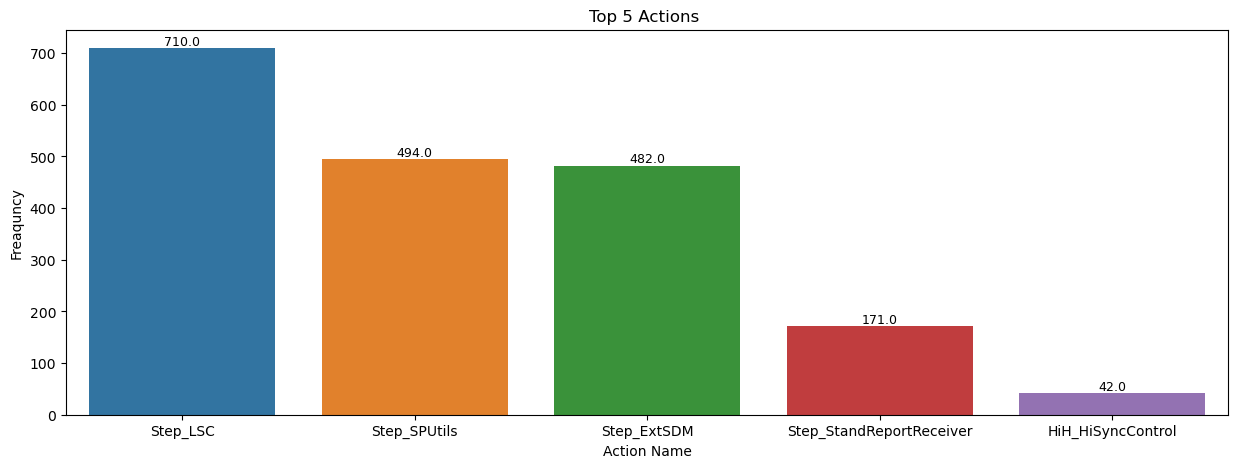

In [48]:
plt.figure(figsize=(15,5))
ax = sns. barplot(x='Name',y='Count',data =component_df)
plt.title('Top 5 Actions ')
plt.xlabel('Action Name')
plt.ylabel('Freaquncy')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black')

<Figure size 1200x600 with 0 Axes>

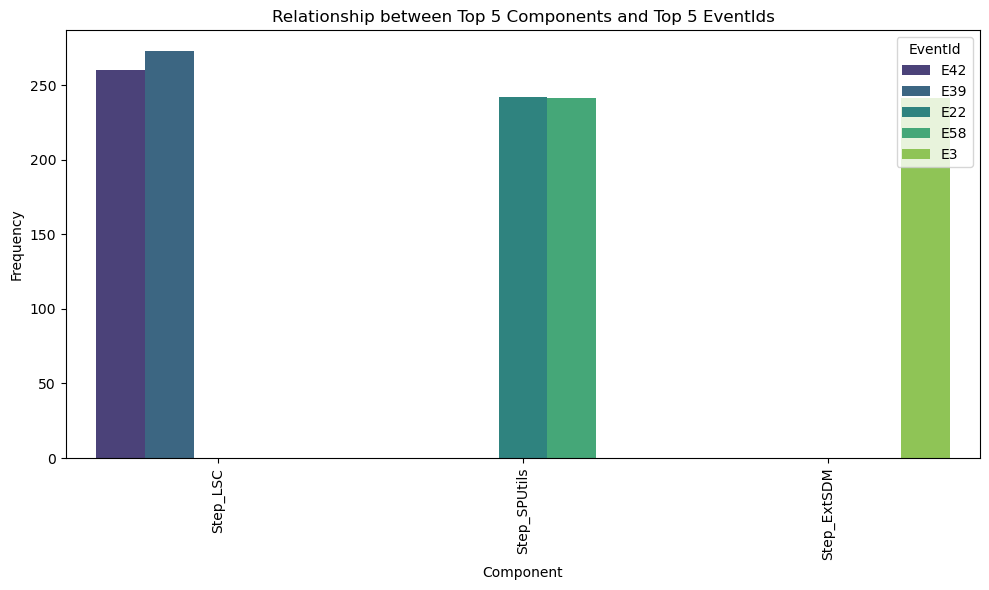

In [59]:
plt.figure(figsize=(12,6))
# Calculate the frequency of top 5 components and EventIds
top_5_components = health_df['Component'].value_counts().head(5).index.tolist()
top_5_event_ids = health_df['EventId'].value_counts().head(5).index.tolist()

# Filter the DataFrame based on the top 5 components and EventIds
top_5_components_df = health_df[health_df['Component'].isin(top_5_components)]
top_5_events_df = health_df[health_df['EventId'].isin(top_5_event_ids)]

# Plotting the relationships between top 5 components and top 5 EventIds
plt.figure(figsize=(10, 6))
sns.countplot(x='Component', hue='EventId', data=top_5_components_df[top_5_components_df['EventId'].isin(top_5_event_ids)], palette='viridis')
plt.title('Relationship between Top 5 Components and Top 5 EventIds')
plt.xlabel('Component')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend(title='EventId')
plt.tight_layout()
plt.show()
